In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

[0]


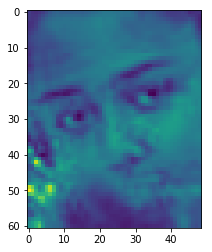

[0]


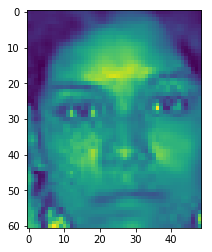

[0]


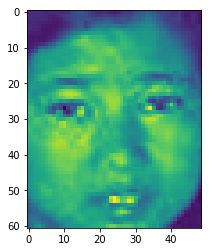

[0]


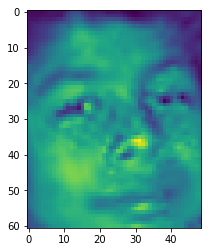

[0]


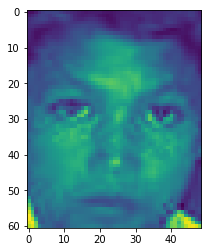

[0]


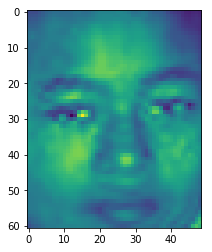

[0]


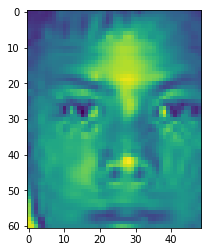

[0]


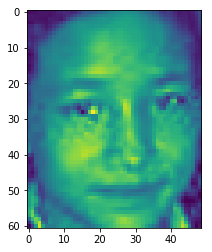

[0]


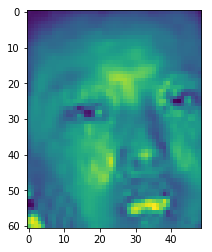

[0]


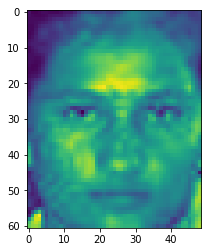

[0]


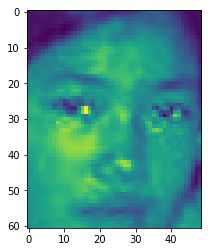

[0]


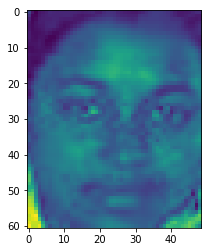

[0]


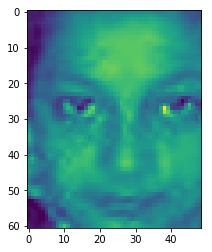

[0]


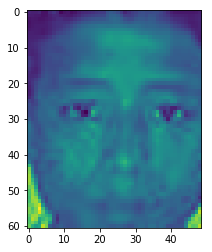

[0]


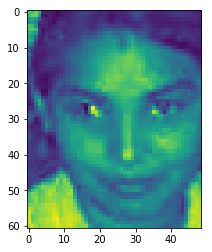

[0]


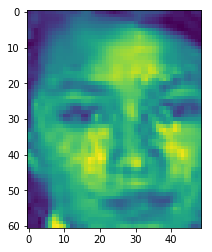

[0]


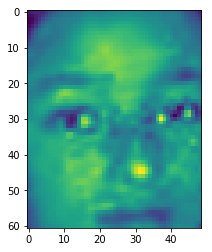

[0]


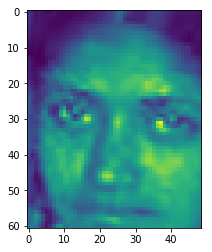

[0]


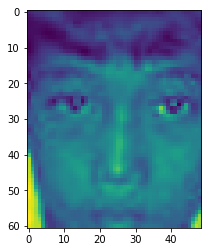

[0]


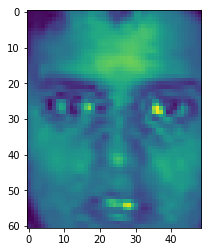

[0]


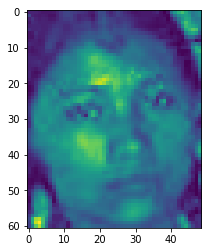

[0]


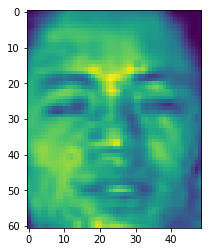

[0]


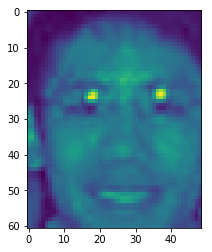

[0]


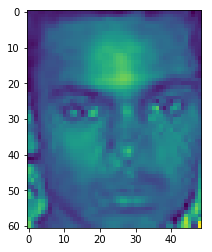

[0]


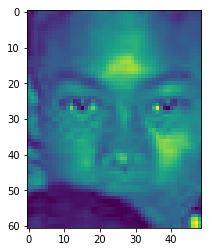

[0]


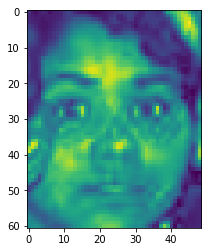

[0]


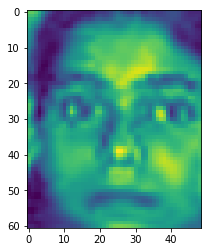

[0]


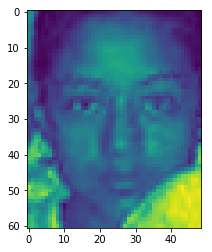

[0]


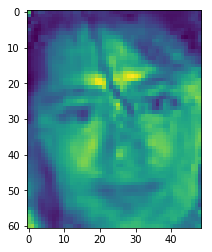

[0]


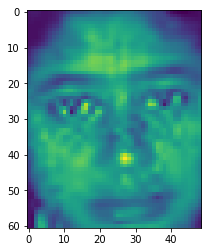

[0]


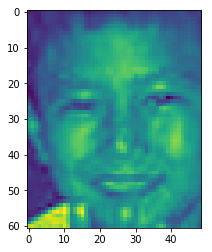

[2]


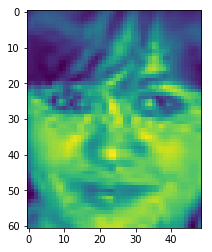

In [9]:
tf.reset_default_graph()

def parser(serialized_example):
    feature = {
        'age' : tf.FixedLenFeature([1], tf.int64),
        'img' : tf.FixedLenFeature([61*49], tf.int64)
    }
    parsed_feature = tf.parse_single_example(serialized_example, feature)
    age = tf.cast(parsed_feature['age'], tf.int32)
    img = tf.cast(parsed_feature['img'], tf.float32)
    return age, img
    
dataset_dir = './cnn_dataset/face_train.tfrecord'
dataset = tf.contrib.data.TFRecordDataset(dataset_dir).map(parser)
dataset = dataset.batch(32)
dataset = dataset.shuffle(7777)

itr = dataset.make_one_shot_iterator()

age, img = itr.get_next()
img = tf.reshape(img, [-1, 61, 49])

with tf.Session() as sess:
    _age, _img = sess.run([age, img])
    for i in range(32):
        print(_age[i])
        plt.imshow(_img[i])
        plt.show()
